In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# PCA와 t-SNE는 스케일링에 민감하므로 표준화 수행
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])

Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000164


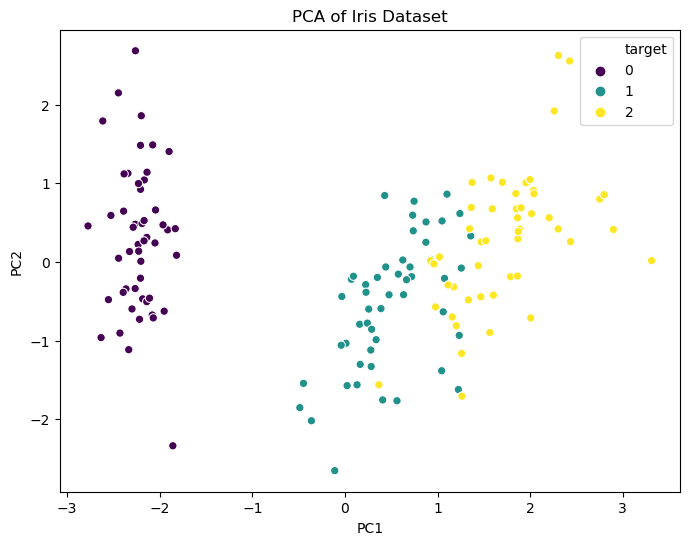

In [41]:
from sklearn.decomposition import PCA

# 1. PCA 객체 생성 (2차원으로 축소)
pca = PCA(n_components=2)

# 2. 데이터에 fit_transform 적용
principal_components = pca.fit_transform(scaled_features)

# 3. 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']

# 설명된 분산 비율 확인
print(f"Explained variance ratio: {pca.explained_variance_ratio_}") # [0.72962445 0.22850762]
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}") # 0.9581320720000164

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis')
plt.title('PCA of Iris Dataset')
plt.show()

In [47]:
print(df.iloc[:, :-1].columns)
print(pca.components_)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


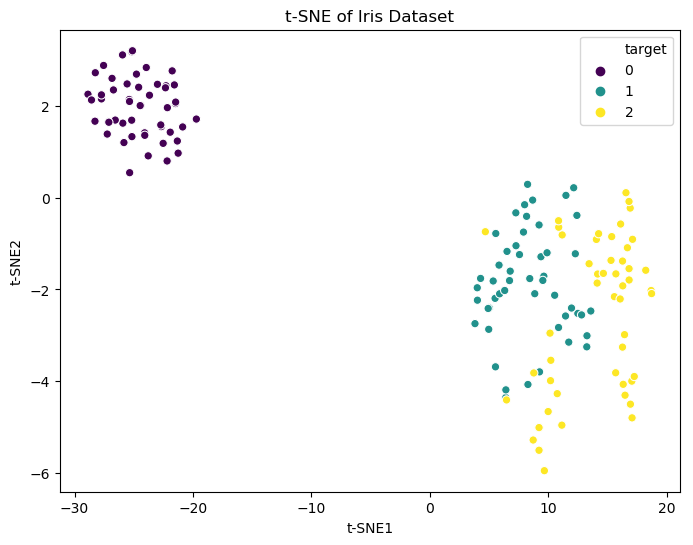

In [48]:
from sklearn.manifold import TSNE

# 1. t-SNE 객체 생성 (2차원으로 축소)
# perplexity: 각 점이 고려하는 이웃의 수. 보통 5~50 사이 값 사용.
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# 2. 데이터에 fit_transform 적용
tsne_features = tsne.fit_transform(scaled_features)

# 3. 결과를 데이터프레임으로 변환
df_tsne = pd.DataFrame(data=tsne_features, columns=['t-SNE1', 't-SNE2'])
df_tsne['target'] = df['target']

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='target', data=df_tsne, palette='viridis')
plt.title('t-SNE of Iris Dataset')
plt.show()

In [50]:
tsne_features

array([[-25.380981  ,   2.1414094 ],
       [-21.57253   ,   2.4590611 ],
       [-22.676508  ,   1.5494418 ],
       [-21.920462  ,   1.4280308 ],
       [-25.92523   ,   1.6252446 ],
       [-27.728111  ,   2.1538088 ],
       [-23.78022   ,   0.91241926],
       [-24.407108  ,   2.01315   ],
       [-20.872732  ,   1.5425832 ],
       [-22.278765  ,   2.4401507 ],
       [-26.834486  ,   2.6018693 ],
       [-24.082727  ,   1.414297  ],
       [-21.472145  ,   2.052368  ],
       [-21.253296  ,   0.9710173 ],
       [-28.247654  ,   2.7243547 ],
       [-28.867289  ,   2.2561116 ],
       [-27.729715  ,   2.2420812 ],
       [-25.358004  ,   2.0985634 ],
       [-27.548893  ,   2.8834429 ],
       [-27.102718  ,   1.6571485 ],
       [-25.163866  ,   3.1824121 ],
       [-26.56213   ,   1.6923231 ],
       [-25.347536  ,   0.54541457],
       [-23.944155  ,   2.8383694 ],
       [-24.071552  ,   1.3600279 ],
       [-21.755604  ,   2.7651107 ],
       [-24.458387  ,   2.0077298 ],
 